In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
data = pd.read_csv("Fish.csv")

In [48]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


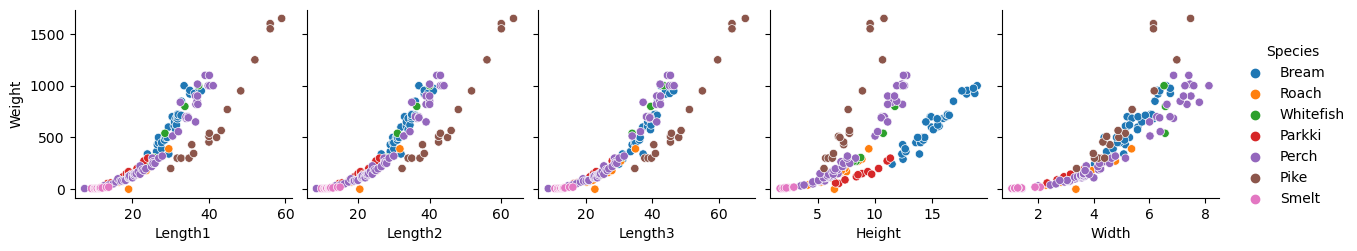

In [49]:
sns.pairplot(data= data, x_vars = ['Length1','Length2','Length3','Height','Width'], y_vars = 'Weight', hue = 'Species')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ct = make_column_transformer((StandardScaler(),['Length1','Length2','Length3','Height','Width']),
    (OneHotEncoder(handle_unknown="ignore"), ["Species"]))

#create X and Y values
data_cleaned = data.drop(["Weight"],axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned, y, test_size=0.2, random_state=42)

X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))
X_train_normal

(127, 6) (32, 6) (127,) (32,)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.130830,-1.148787,-1.220929,-1.062734,-1.104417,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.709250,1.659079,1.536085,-0.259441,0.270423,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.234492,-0.178283,-0.004342,0.891871,0.163613,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.627269,-0.602290,-0.669526,-0.681725,-0.627854,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.576913,-0.555178,-0.511983,-0.449896,-0.374310,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.224421,-0.225395,-0.188143,0.638351,-0.120212,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123,-0.033068,-0.036948,-0.153133,-0.252311,-0.138516,0.0,0.0,1.0,0.0,0.0,0.0,0.0
124,0.319424,0.339947,0.529556,1.538754,0.455176,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,-0.576913,-0.555178,-0.625764,-0.510502,-0.494878,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
# class LinearRegressionModel():
#     def fit(self, X, Y):
#         XT = np.transpose(X)
#         XTX =  np.dot(XT, X)
#         XTX1 = np.linalg.inv(XT.dot(X))
#         XTY = XT.dot(Y)
#         Theta = XTX1.dot(XTY)
#         self.theta = Theta

# linearModel = LinearRegressionModel()
# linearModel.fit(x_train, y_train)
# linearModel.theta  
# pred_a = np.dot(x_test,linearModel.theta) 

TypeError: can't multiply sequence by non-int of type 'float'

In [52]:
score_MSE_1 = mean_squared_error(pred_a, y_test)
score_MAE_1 = mean_absolute_error(pred_a, y_test)
score_r2score_1 = r2_score(pred_a, y_test)
result_scores_1 = []
result_scores_1.append(("Test", score_MSE_1, score_MAE_1, score_r2score_1))

In [53]:
df_result_scores_1 = pd.DataFrame(result_scores_1,columns=["model","mse","mae","r2score"])
df_result_scores_1

,model,mse,mae,r2score
0,Test,48079.806011,189.521522,-0.291356


In [59]:
reg = LinearRegression()
reg.fit(X_train_normal, y_train)
pred = reg.predict(X_test_normal)
score_MSE = mean_squared_error(pred, y_test)
score_MAE = mean_absolute_error(pred, y_test)
score_r2score = r2_score(pred, y_test)
result_scores= []
result_scores.append(("Linear Regression", score_MSE, score_MAE, score_r2score))

In [60]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Linear Regression,7007.38319,65.300052,0.939648


In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 50)
model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, space, n_iter=100, 
     scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv,                 random_state=42)
result = search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -92.51931163168688
Best Hyperparameters: {'alpha': 0.00016936519054545053, 'solver': 'sag'}


In [ ]:
reg = Ridge(alpha=0.24171039031894245, solver ="sag" )
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
score_MSE = mean_squared_error(pred, y_test)
score_MAE = mean_absolute_error(pred, y_test)
score_r2score = r2_score(pred, y_test)
to_append = ["Ridge_hyper_tuned",round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)]
df_result_scores.loc[len(df_result_scores)] = to_append
df_result_scores

,model,mse,mae,r2score
0,LinearRegression,16763.887193,103.909417,0.872027
1,Ridge_hyper_tuned,17072.290000,104.340000,0.870000


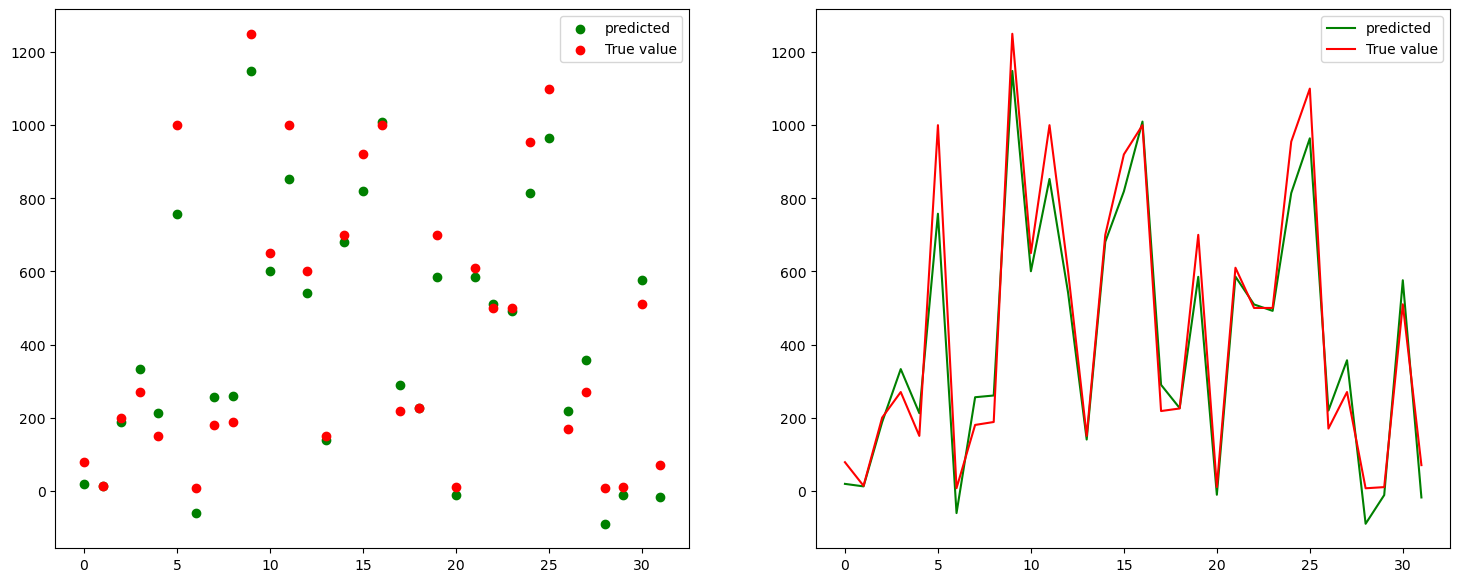

In [66]:
# winner model
reg = LinearRegression()
reg.fit(X_train_normal, y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(x_test)), pred,color="green",label="predicted")
plt.scatter(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(x_test)), pred,color="green",label="predicted")
plt.plot(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()
plt.show()